<a href="https://colab.research.google.com/github/Buortau/Python-Projects/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Vaccination Analysis


---


[Kaggle Dataset](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)

This project is an analysis of the progress of the worldwide COVID-19 vaccination broken down by country and by vaccine.  The purpose of this study is to analyze each of the following: how much of each vaccine is used by each country, which vaccines are most widely used around the world, and which countries have the highest levels of vaccinations per day.  The numeric data used is centered around the number of total vaccinations per vaccine and per country at the given date.  This can be widely used by the COVID-19 vaccine manufacturers so that they can better determine the demand of their vaccine.  The data can also be used by government officials of various countries so that they can view which vaccines are more popular.  Government officials and news broadcasters can also use this data to visualize which countries are most vaccinated and which countries are least vaccinated.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr

In [ ]:
covid_mfg_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/covid.csv')
covid_mfg_df

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30999
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
10174,Uruguay,2021-07-30,Pfizer/BioNTech,1481460
10175,Uruguay,2021-07-30,Sinovac,3217656
10176,Uruguay,2021-07-31,Oxford/AstraZeneca,83562
10177,Uruguay,2021-07-31,Pfizer/BioNTech,1485745


The table above displays the original dataset.  Each row of the dataset contains the following information: the countries that received each vaccine, the date that the data was collected, the vaccine manufacturer, and the total number of vaccinations per vaccine per country at the given date.

In [ ]:
country_sorted = covid_mfg_df.groupby(['location'])['total_vaccinations'].sum().sort_values(ascending=True)
country_sorted.index

Index(['Liechtenstein', 'Luxembourg', 'Malta', 'Cyprus', 'Estonia', 'Slovenia',
       'Bulgaria', 'Iceland', 'Croatia', 'Slovakia', 'Ireland', 'Finland',
       'Denmark', 'Latvia', 'Austria', 'Sweden', 'Portugal', 'Belgium',
       'Hungary', 'Netherlands', 'Lithuania', 'Uruguay', 'Poland', 'Spain',
       'Switzerland', 'Czechia', 'Romania', 'Chile', 'Japan', 'Italy',
       'France', 'Germany', 'United States'],
      dtype='object', name='location')

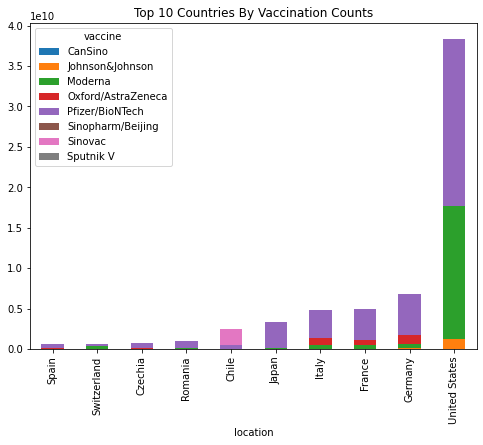

In [ ]:
stacked_bar = covid_mfg_df.groupby(['location', 'vaccine'])['total_vaccinations'].sum().unstack().fillna(0)
stacked_bar = stacked_bar.reindex(index=country_sorted.index).tail(10)
SBChart=stacked_bar.plot(kind='bar', stacked=True)
plt.title('Top 10 Countries By Vaccination Counts')
plt.rcParams["figure.figsize"] = (8, 6)

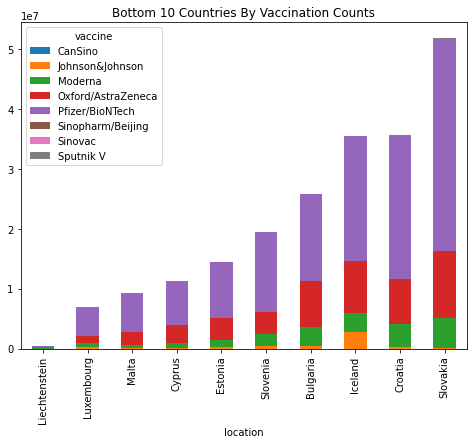

In [ ]:
stacked_bar = covid_mfg_df.groupby(['location', 'vaccine'])['total_vaccinations'].sum().unstack().fillna(0)
stacked_bar = stacked_bar.reindex(index=country_sorted.index).head(10)
SBChart=stacked_bar.plot(kind='bar', stacked=True)
plt.title('Bottom 10 Countries By Vaccination Counts')
plt.rcParams["figure.figsize"] = (8, 6)

These stacked bar charts show the 10 most vaccinated countries and the 10 least vaccinated countries.  Because of space constraints, only 20 countries were shown.  The charts show that the United States is overwhelmingly the most vaccinated country with Germany being the second most vaccinated country.  It also shows that Liechtenstein is the least vaccinated country.  From eyeballing, Pfizer appears to be the most used vaccine in the United States.  It also appears to be most used vaccine across the world.  The charts also illustrate the vaccines that are used by each country.  It also can be used to determine the demand of their vaccine across the globe.

In [ ]:
vaccinated_by_countries=covid_mfg_df.groupby("location")['total_vaccinations'].sum()
maximum_vaccinated_countries = vaccinated_by_countries.sort_values(ascending=False)
country_df=pd.DataFrame({"total_vaccinations":maximum_vaccinated_countries})
country_df

,total_vaccinations
location,
United States,38391688819
Germany,6810620805
France,5013297208
Italy,4851996640
Japan,3325052747
Chile,2500896215
Romania,962082411
Czechia,755958711
Switzerland,672672016


The table above shows the most vaccinated countries in descending order based on total vaccinations.  The table lists 30 countries out of a total of 195 countries around the world; however it does not include very populated countries such as China and Russia.  This confirms that the United States and Germany are the most vaccinated countries.  This would be very useful for news broadcasters and government officials.

In [ ]:
France=covid_mfg_df[(covid_mfg_df['location']=='France')]
Italy=covid_mfg_df[(covid_mfg_df['location']=='Italy')]
ttest_ind(France['total_vaccinations'], Italy['total_vaccinations'])

Ttest_indResult(statistic=0.8478575172788478, pvalue=0.39666287669112277)

Since the top two most vaccinated countries (United States and Germany) have vaccination levels much higher than the rest of the world, only France and Italy's total vaccination levels were compared since their vaccination levels were similar.  A t-test was run on the third and fourth most vaccinated countries (France and Italy). Because the p-value is greater than 0.05, the null hypothesis is true and there is no statistical difference between the vaccination levels of the two countries.

In [ ]:
vaccinated_by_vaccine=covid_mfg_df.groupby("vaccine")['total_vaccinations'].sum()
most_popular_vaccines = vaccinated_by_vaccine.sort_values(ascending=False)
most_popular_vaccines

vaccine
Pfizer/BioNTech       40231019178
Moderna               18719024193
Oxford/AstraZeneca     3324206459
Sinovac                2286980429
Johnson&Johnson        1571833319
Sinopharm/Beijing        32570689
Sputnik V                27759749
CanSino                  19964457
Name: total_vaccinations, dtype: int64

The table above shows how frequently each vaccine is being used in descending order.  This confirms that Pfizer and Moderna are the two most popular and widely used vaccines worldwide.  This table gives an even better idea as to which vaccines are being used the most.

In [ ]:
Pfizer=covid_mfg_df[(covid_mfg_df['vaccine']=='Pfizer/BioNTech')]
Moderna=covid_mfg_df[(covid_mfg_df['vaccine']=='Moderna')]
ttest_ind(Pfizer['total_vaccinations'], Moderna['total_vaccinations'])

Ttest_indResult(statistic=7.064844142797141, pvalue=1.7927079917144561e-12)

A t-test was run on the 2 most popular and widely used vaccines: Pfizer and Moderna.  Because the p-value was less than 0.05, the null hypothesis will be rejected and there is a statistical difference between the vaccination usage of the two most widely used vaccines.

The purpose of this study is to analyze each of the following: how much of each vaccine is used by each country, which vaccines are most widely used around the world, and which countries have the highest levels of vaccinations per day.  

The first purpose of this study is to determine how much of each vaccine is used by each country.  The amount of vaccines used by various countries was highlighted by stacked bar charts of the ten most vaccinated countries and the ten least vaccinated countries.  Because of space constraints, only 20 countries were highlighted.  Based on eye-balling, the United States and Germany are the two most vaccinated countries while Liechtenstein is the least vaccinated country.  It also appears that Pfizer and Moderna are the two most widely used vaccines in the United States, while most countries have high proportions of Pfizer usage.

The second purpose of this study is to determine which vaccines are most popular in order to help vaccine manufacturers determine the demand of their vaccines and to help government officials get a good understanding of which vaccines are most widely used.  These are illustrated by a showing the most popular vaccines sorted in descending order according to the sum of total vaccinations.  A t-test was run comparing the sum of total vaccinations for the top two most widely used vaccines (Pfizer and Moderna) and there was a statistical difference. 

Another purpose of the study was to determine which countries are the most vaccinated and which are least vaccinated.  The stacked bar charts help visualize this too.  To further highlight the most vaccinated countries and the least vaccinated countries, a table showing the sum of total vaccinations by country in descending order was displayed directly below the stacked bar charts.  A t-test was run on the third and fourth most vaccinated countries (France and Italy), which showed that there is no statistical difference between those vaccination levels.  

Those 3 studies and all the visualizations help government officials and news broadcasters better understand which countries are most vaccinated and which countries are least vaccinated.